# Explore here

In [1]:
# Your code here

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://breathecode.herokuapp.com/asset/internal-link?id=927&path=AB_NYC_2019.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [2]:
# Guardado de la data cruda en la carpte data
df.to_csv('../data/raw/data_cruda.csv',index=False)

In [3]:
# INICIAMOS EL EDA
# EXPLORACION Y LIMPIEZA DE DATOS

df.info()

<class 'pandas.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  str    
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  str    
 4   neighbourhood_group             48895 non-null  str    
 5   neighbourhood                   48895 non-null  str    
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  str    
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     38843 non-n

# Observacion
hay 10 columnas numericas y 6 str
la columna 12 y 13 tienen 1000 datos nulos
La variable objetivo sera PRICE

In [4]:
# reviso si exiten duplicados
df.drop('id', axis=1).duplicated().sum()

np.int64(0)

No existen duplicado

In [5]:
# eliminamos datos irrelevantes para predecir price

df.drop(['id','name','host_id','host_name','last_review','reviews_per_month','latitude','longitude'],axis=1, inplace=True)
df.head()
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   neighbourhood_group             48895 non-null  str  
 1   neighbourhood                   48895 non-null  str  
 2   room_type                       48895 non-null  str  
 3   price                           48895 non-null  int64
 4   minimum_nights                  48895 non-null  int64
 5   number_of_reviews               48895 non-null  int64
 6   calculated_host_listings_count  48895 non-null  int64
 7   availability_365                48895 non-null  int64
dtypes: int64(5), str(3)
memory usage: 3.0 MB


<function matplotlib.pyplot.show(close=None, block=None)>

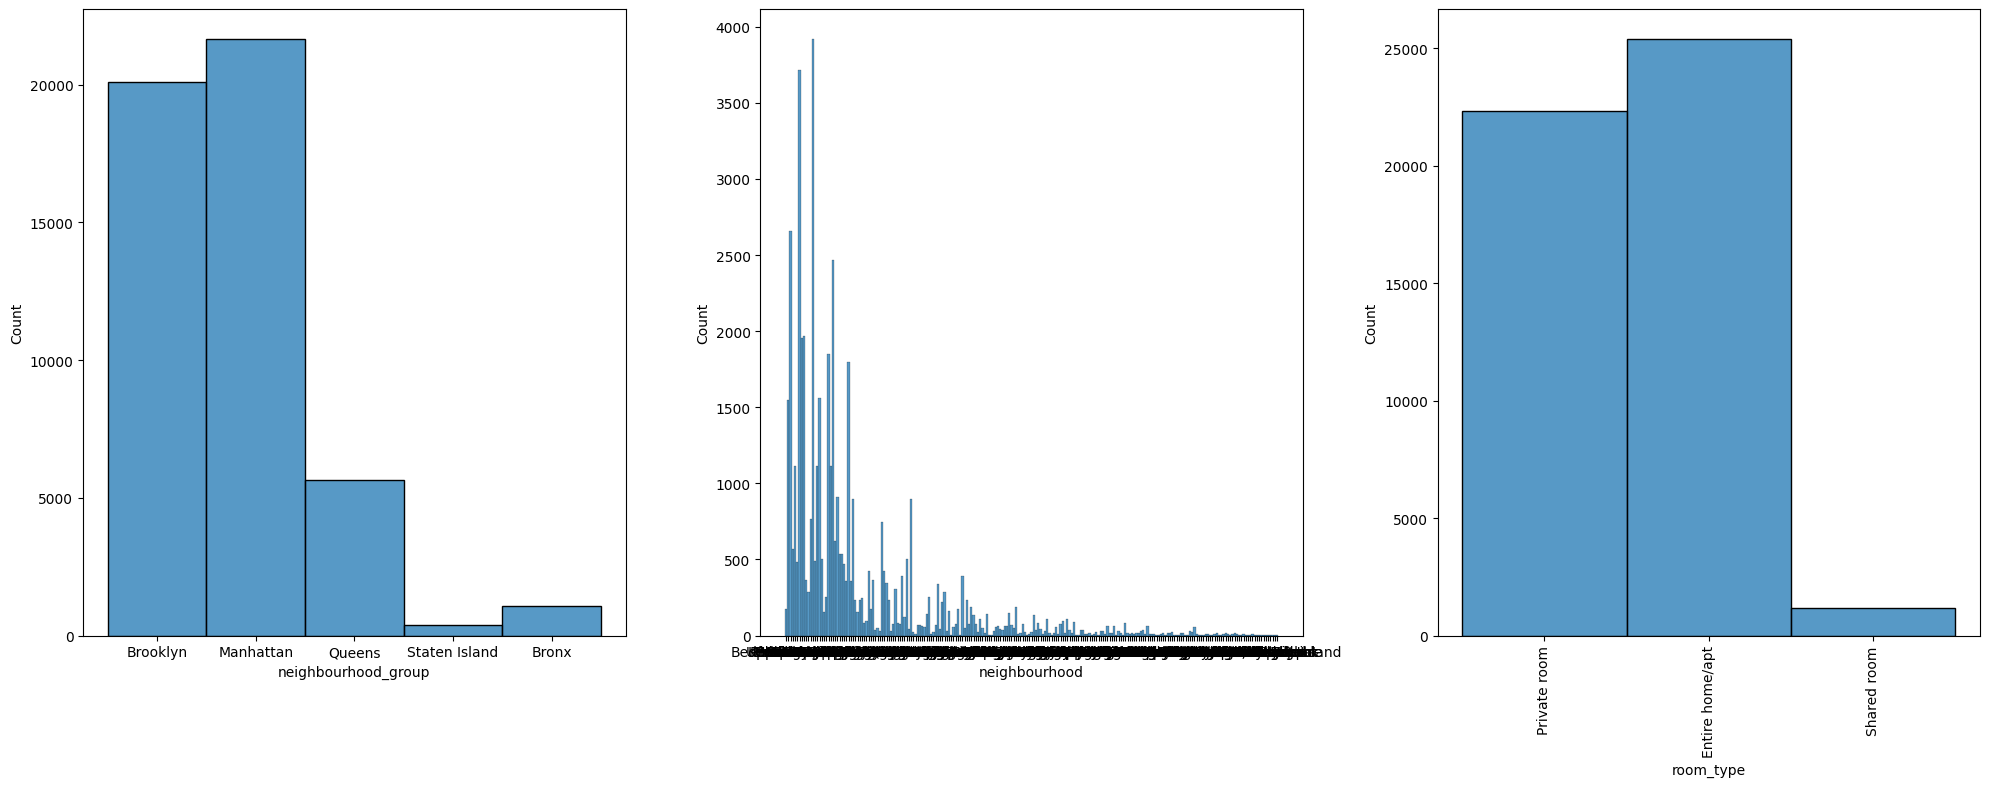

In [6]:
# ANALISIS UNIVARIANTE

# VARAIBLES CATEGORICAS

fig, axis = plt.subplots(1,3,figsize=(20,7))

sns.histplot(ax = axis[0], data = df, x = 'neighbourhood_group')
sns.histplot(ax = axis[1], data = df, x = 'neighbourhood')
sns.histplot(ax = axis[2], data = df, x = 'room_type')

plt.tight_layout()
plt.xticks(rotation=90)
plt.show

# observacion
se puede observar que la distribucion de neighbourdhood_group se ve mas limpia que la de neighbourdhood e indican lo mismo.

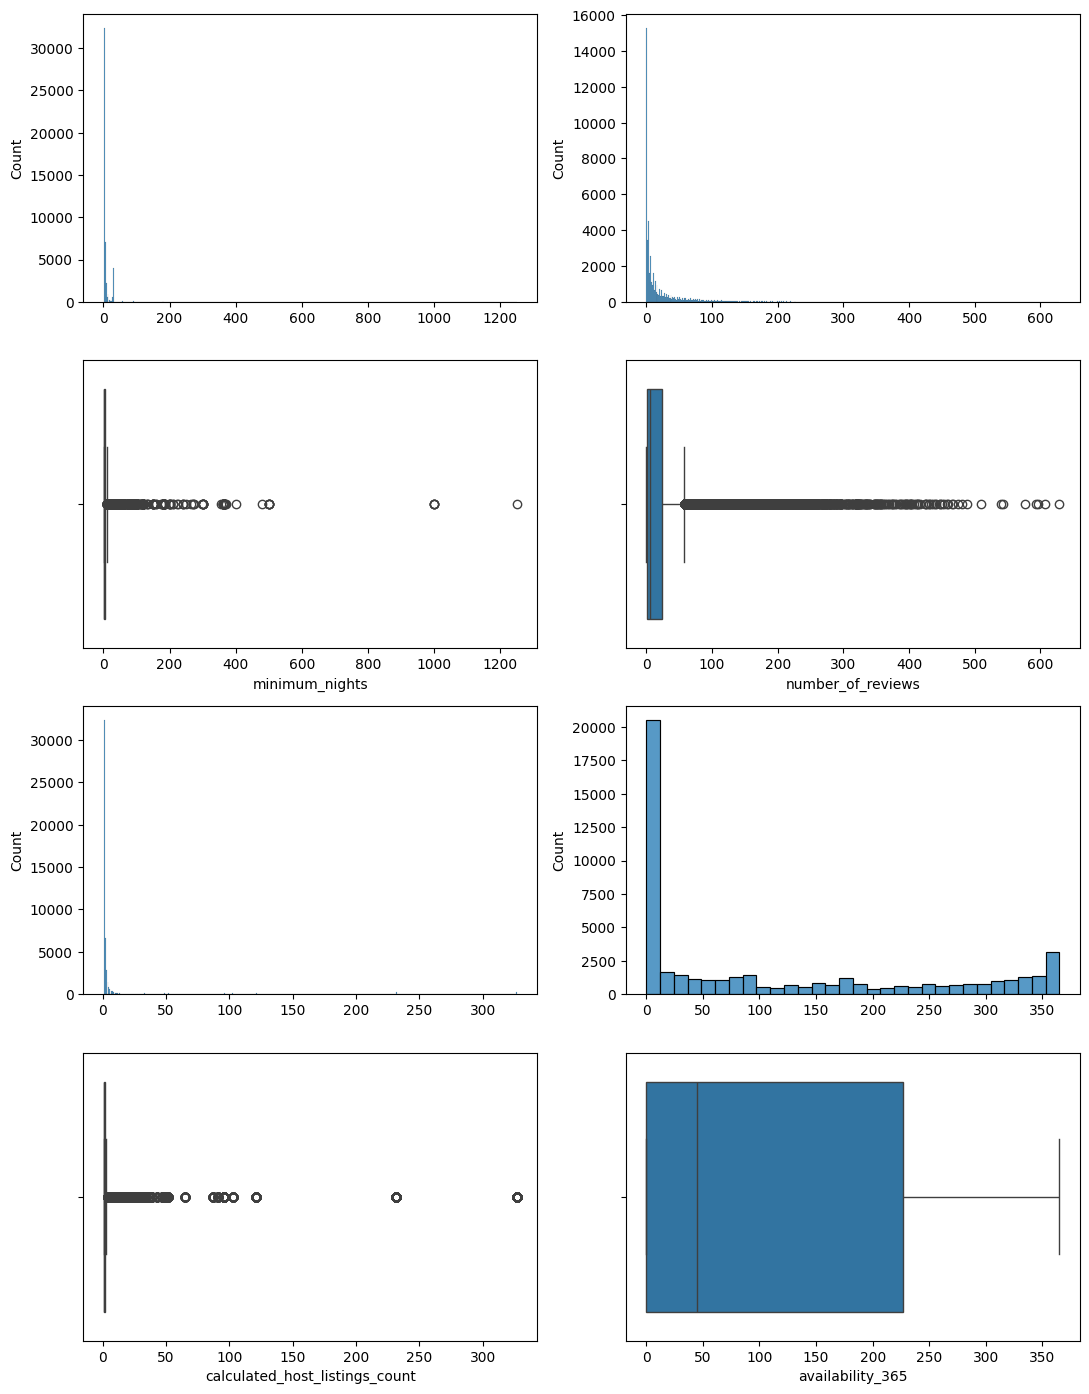

In [7]:
# VARIABLES NUMERICAS

fig, axis = plt.subplots(4, 2, figsize = (11,14))

sns.histplot(ax = axis[0,0], data = df, x= 'minimum_nights').set(xlabel=None)
sns.boxplot(ax = axis[1,0], data = df, x= 'minimum_nights')
sns.histplot(ax = axis[0,1], data = df, x= 'number_of_reviews').set(xlabel=None)
sns.boxplot(ax = axis[1,1], data = df, x= 'number_of_reviews')
sns.histplot(ax = axis[2,0], data = df, x= 'calculated_host_listings_count').set(xlabel=None)
sns.boxplot(ax = axis[3,0], data = df, x= 'calculated_host_listings_count')
sns.histplot(ax = axis[2,1], data = df, x= 'availability_365').set(xlabel=None)
sns.boxplot(ax = axis[3,1], data = df, x= 'availability_365')

plt.tight_layout()
plt.show()

# observacion 
La mayoria de las variable tienen gran cantidad de outliers, por la naturaleza de la categoria es normal. Sin embargo, la variable 'minimun nights' tiene unos outliers que parecieran tener un error.

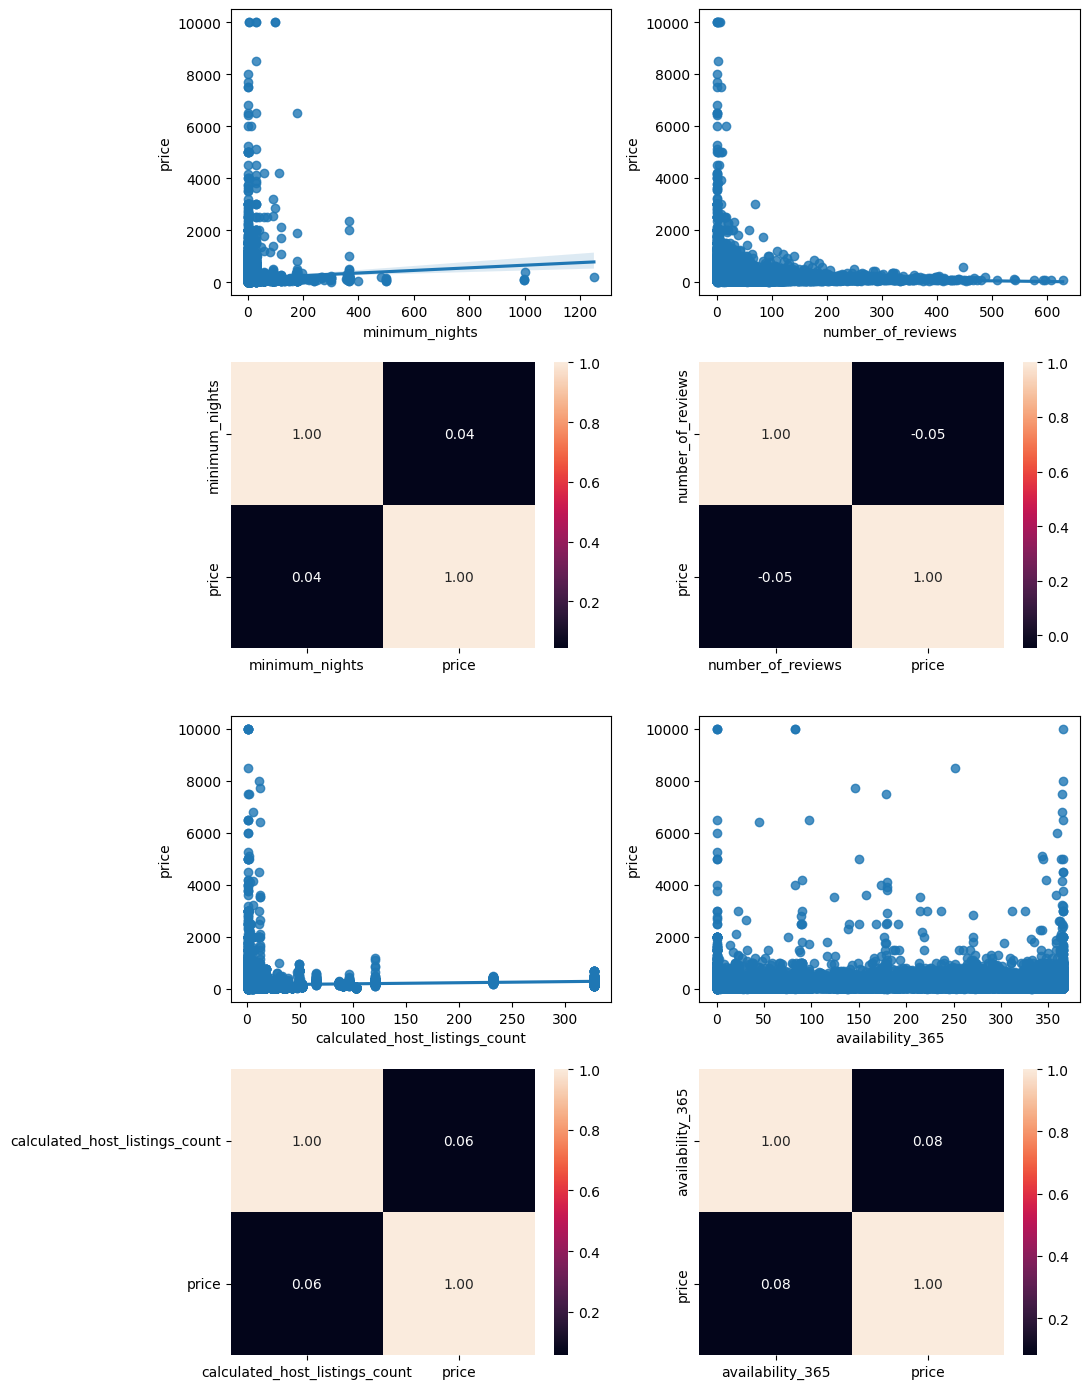

In [8]:
# ANALISIS MULTIVARIANTE. variables vs objetivo

# ANALISIS NUMERICO - NUMERICO

fig, axis = plt.subplots(4,2, figsize = (11,14))

sns.regplot(ax = axis[0,0], data = df, x = 'minimum_nights', y = 'price')
sns.heatmap(df[['minimum_nights','price']].corr(), annot = True, fmt = '.2f', ax = axis[1,0])
sns.regplot(ax = axis[0,1], data = df, x = 'number_of_reviews', y = 'price')
sns.heatmap(df[['number_of_reviews','price']].corr(), annot = True, fmt = '.2f', ax = axis[1,1])
sns.regplot(ax = axis[2,0], data = df, x = 'calculated_host_listings_count', y = 'price')
sns.heatmap(df[['calculated_host_listings_count','price']].corr(), annot = True, fmt = '.2f', ax = axis[3,0])
sns.regplot(ax = axis[2,1], data = df, x = 'availability_365', y = 'price')
sns.heatmap(df[['availability_365','price']].corr(), annot = True, fmt = '.2f', ax = axis[3,1])

plt.tight_layout()
plt.show()

In [9]:
# ANALISIS CATEGORICO - NUMERICO

display(df.groupby('neighbourhood_group')['price'].mean().rename('price_rate').to_frame())
display(df.groupby('neighbourhood')['price'].mean().rename('price_rate').to_frame())
display(df.groupby('room_type')['price'].mean().rename('price_rate').to_frame())


,price_rate
neighbourhood_group,
Bronx,87.496792
Brooklyn,124.383207
Manhattan,196.875814
Queens,99.517649
Staten Island,114.812332


,price_rate
neighbourhood,
Allerton,87.595238
Arden Heights,67.250000
Arrochar,115.000000
Arverne,171.779221
Astoria,117.187778
...,...
Windsor Terrace,138.993631
Woodhaven,67.170455
Woodlawn,60.090909


,price_rate
room_type,
Entire home/apt,211.794246
Private room,89.780973
Shared room,70.127586


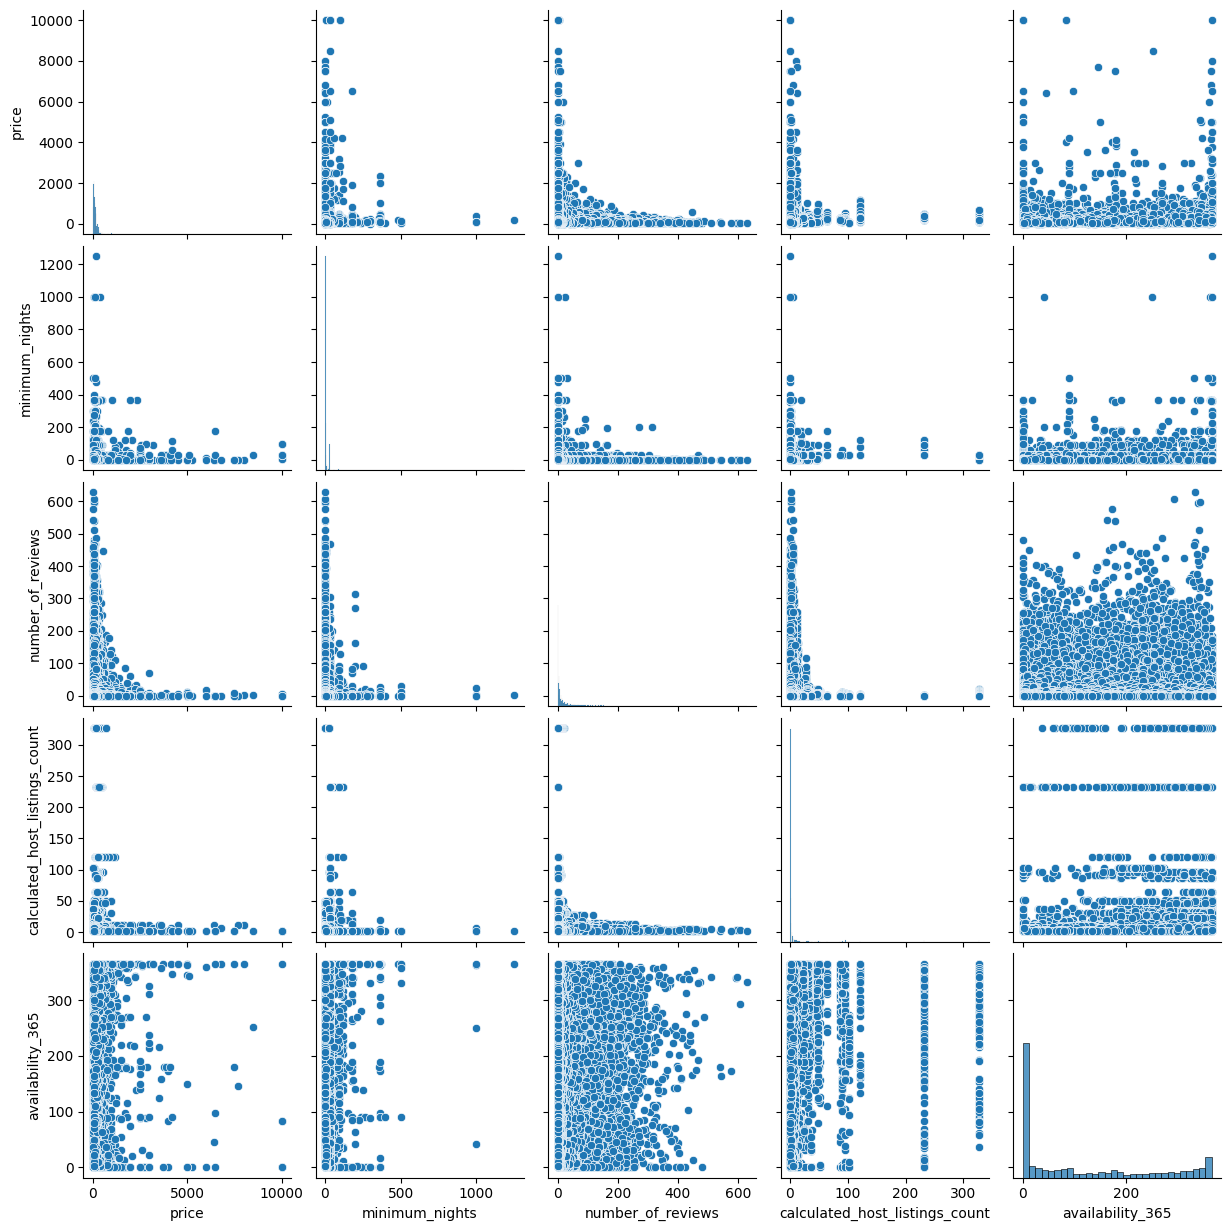

In [10]:
sns.pairplot(data=df)

In [11]:
# INGENIERIA DE CARACTERISTICAS

# ANALISIS DE OUTLIERS

df.describe()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,7.143982,112.781327
std,240.154170,20.510550,44.550582,32.952519,131.622289
min,0.000000,1.000000,0.000000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,327.000000,365.000000


In [29]:
# Como se observa en los boxplot 'minimun nigths' tiene outliers que tienen sentido hasta 365 dias, de ahi en adelante no parece tener sentido. Ademas tenemos una columna que hace referencia hasta 365

df = df[df['minimum_nights']<365]
df = df[df['price']>0]
df = df.drop('neighbourhood',axis=1)

<Axes: xlabel='minimum_nights'>

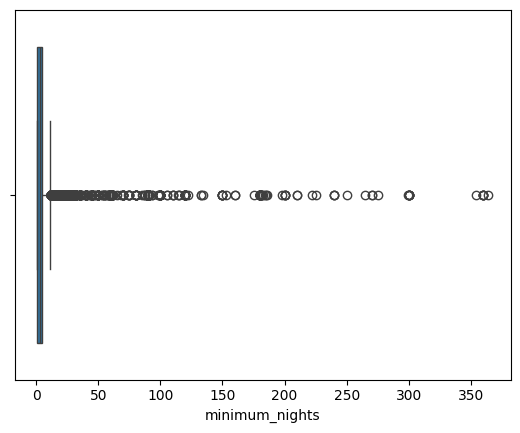

In [30]:
sns.boxplot(data=df,x="minimum_nights")

In [33]:
# ANALIZAMOS VALORES FALTANTES

df.isnull().sum()

neighbourhood_group               0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [36]:
df["room_type"] = pd.factorize(df["room_type"])[0]
df["neighbourhood_group"] = pd.factorize(df["neighbourhood_group"])[0]

df.head()

,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,0,0,149,1,9,6,365
1,1,1,225,1,45,2,355
2,1,0,150,3,0,1,365
3,0,1,89,1,270,1,194
4,1,1,80,10,9,1,0


In [38]:
# Escaldo de valores
#Como la distribucion de las variables esta muy lejano a una distribucion normal y los valor tienen mucha diferencia, se utilizara MinMax

from sklearn.preprocessing import MinMaxScaler

num_variables = ['minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365','neighbourhood_group','room_type']
x = df[num_variables]

scaler_minmax = MinMaxScaler()
df_escalado = pd.DataFrame(scaler_minmax.fit_transform(x), index = df.index, columns=num_variables)

df_escalado.head()

,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group,room_type
0,0.000000,0.014308,0.015337,1.000000,0.00,0.0
1,0.000000,0.071542,0.003067,0.972603,0.25,0.5
2,0.005510,0.000000,0.000000,1.000000,0.25,0.0
3,0.000000,0.429253,0.000000,0.531507,0.00,0.5
4,0.024793,0.014308,0.000000,0.000000,0.25,0.5


In [39]:
df_escalado['price'] = df['price']
df_escalado.head()

,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group,room_type,price
0,0.000000,0.014308,0.015337,1.000000,0.00,0.0,149
1,0.000000,0.071542,0.003067,0.972603,0.25,0.5,225
2,0.005510,0.000000,0.000000,1.000000,0.25,0.0,150
3,0.000000,0.429253,0.000000,0.531507,0.00,0.5,89
4,0.024793,0.014308,0.000000,0.000000,0.25,0.5,80


In [53]:
# SELECCION DE CARACTERISTICAS

from sklearn.feature_selection import chi2,SelectKBest
from sklearn.model_selection import train_test_split

x = df_escalado.drop('price',axis=1)
y = df_escalado['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)


modelo_seleccion = SelectKBest(chi2, k=4)
modelo_seleccion.fit(x_train, y_train)
ix = modelo_seleccion.get_support()

x_train_selec = pd.DataFrame(modelo_seleccion.transform(x_train), columns = x_train.columns.values[ix])
x_test_selec = pd.DataFrame(modelo_seleccion.transform(x_test), columns = x_test.columns.values[ix])

x_train_selec.head()

,minimum_nights,calculated_host_listings_count,availability_365,room_type
0,0.000000,0.000000,0.079452,0.5
1,0.000000,0.006135,0.942466,0.0
2,0.008264,0.000000,0.000000,0.5
3,0.011019,0.000000,0.372603,0.5
4,0.005510,0.000000,0.000000,0.5


In [54]:
# Guardar los datos

x_train_selec['price'] = y_train
x_test_selec['price'] = y_test

x_test_selec.to_csv('../data/processed/x_test_selec.csv')
x_train_selec.to_csv('../data/processed/x_train_selec.csv')

